# Imports

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2
import os
import keras 

from keras.models import Sequential
from keras.applications import MobileNetV2
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten , GlobalAveragePooling2D,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from PIL import Image

import matplotlib.image as mimg 

import gc
import warnings
warnings.filterwarnings("ignore")

# augmentation code if needed

In [ ]:
# output_dir ='/kaggle/working/augmented_images'
# os.makedirs(output_dir, exist_ok=True)

# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# data_dir = '/kaggle/input/face-mask-dataset/data'  
# output_count = 2  
# label_names=["male","female"]

# for class_name in label_names:  
#     output_dir =f'/kaggle/working/augmented_images/{class_name}'
#     os.makedirs(output_dir, exist_ok=True)
    
#     class_dir = os.path.join(data_dir, class_name)
#     images = os.listdir(class_dir)
    
#     for img_name in images:
#         img_path = os.path.join(class_dir, img_name)
#         img = load_img(img_path) 
#         x = img_to_array(img)  
#         x = np.expand_dims(x, axis=0)  
        

#         i = 0
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix=class_name, save_format='jpeg'):
#             i +=1
#             if i >= output_count:  
#                 break
                


# Show and get data paths

In [2]:
folder_path='/kaggle/input/male-and-female-faces-dataset/Male and Female face dataset'
labels_name=os.listdir(folder_path)
print(labels_name)

['Male Faces', 'Female Faces']


In [3]:
female_path=os.path.join(folder_path,'Female Faces')
male_path=os.path.join(folder_path,'Male Faces') 

In [4]:
male_faces=os.listdir(male_path)
female_faces=os.listdir(female_path)

In [5]:
print(f'male No. {len(male_faces)}')
print(f'female No. {len(female_faces)}')

male No. 2720
female No. 2698


In [6]:
male_labels=[1]*len(male_faces)
female_labels=[0]*len(female_faces)
print("maleNum vs femaleNum  ")
len(male_labels),len(female_labels)

maleNum vs femaleNum  


(2720, 2698)

In [7]:
labels=male_labels+female_labels


In [8]:
labels[:10],labels[-10:]

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
M_samlpe=male_faces[5]
F_samlpe=female_faces[5]

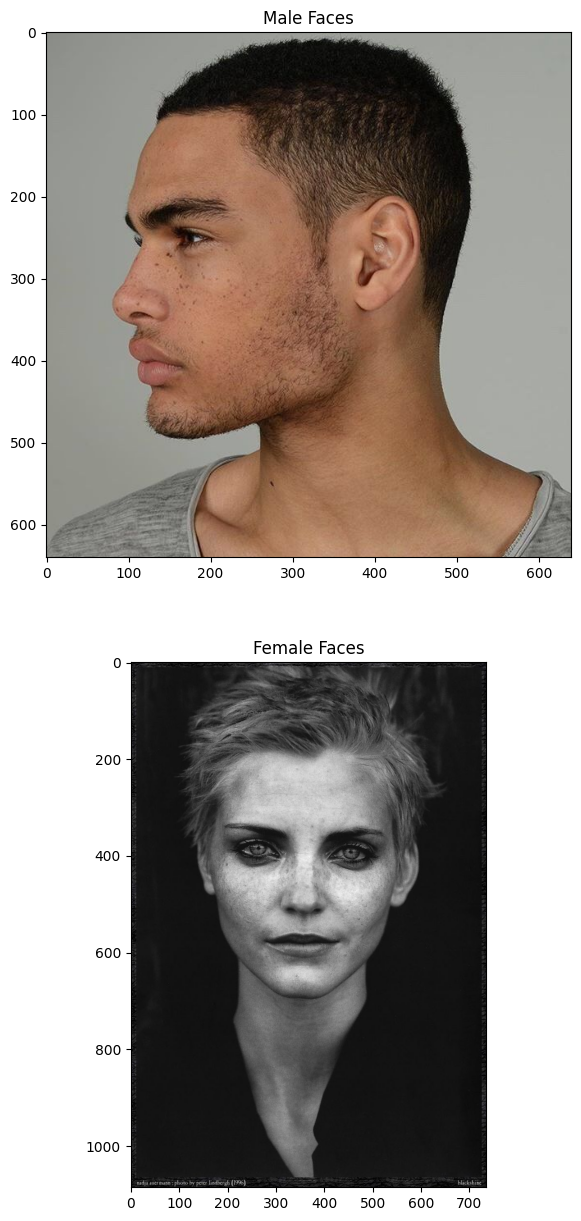

In [12]:
M_image=os.path.join(male_path,M_samlpe)
f_image=os.path.join(female_path,F_samlpe)



n=[M_image,f_image ]
plt.figure(figsize=(15,15))
for i in range(2):

    plt.subplot(2,1,i+1)
    plt.title(labels_name[i])
    img=plt.imread(n[i])
    plt.imshow(img) 

In [13]:
img.shape , type(img)

((1086, 736, 3), numpy.ndarray)

In [14]:
type(labels) , len(labels)

(list, 5418)

# Labaling

In [37]:
images=[]

for img_file in male_faces:
    file_path=os.path.join(male_path,img_file)

    img=Image.open(file_path)

    img=img.resize((128,128))

    img=img.convert('RGB')

    img=np.array(img)

    images.append(img)

    gc.collect

In [38]:

for img_file in female_faces:
    file_path=os.path.join(female_path,img_file)

    img=Image.open(file_path)

    img=img.resize((128,128))

    img=img.convert('RGB')

    img=np.array(img)

    images.append(img)

    gc.collect

In [18]:
type(images)

list

In [39]:
images[0].shape

(128, 128, 3)

In [20]:
len(images)


5418

In [40]:
x=np.array(images)
y=np.array(labels)

In [22]:
type(x) , type(y)


(numpy.ndarray, numpy.ndarray)

In [41]:
x.shape , y.shape 

((5418, 128, 128, 3), (5418,))

# Split data

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
x_train[0], y_train

(array([[[10, 11, 10],
         [11, 11, 11],
         [11, 11, 11],
         ...,
         [21, 21, 21],
         [21, 21, 21],
         [22, 22, 22]],
 
        [[14, 13, 15],
         [19, 18, 19],
         [21, 21, 21],
         ...,
         [22, 22, 22],
         [22, 22, 22],
         [22, 22, 22]],
 
        [[24, 22, 21],
         [23, 21, 21],
         [21, 21, 21],
         ...,
         [22, 22, 22],
         [22, 22, 22],
         [23, 23, 23]],
 
        ...,
 
        [[17, 16, 14],
         [21, 20, 18],
         [22, 20, 21],
         ...,
         [25, 20, 19],
         [24, 19, 19],
         [25, 21, 18]],
 
        [[18, 17, 15],
         [20, 19, 17],
         [23, 21, 21],
         ...,
         [27, 22, 22],
         [26, 22, 21],
         [26, 22, 20]],
 
        [[20, 19, 17],
         [21, 20, 18],
         [24, 22, 22],
         ...,
         [26, 22, 19],
         [28, 23, 21],
         [26, 21, 20]]], dtype=uint8),
 array([0, 1, 1, ..., 0, 0, 1]))

In [45]:
x_train.shape , y_train.shape

((4334, 128, 128, 3), (4334,))

# Build generator

In [46]:
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow(x_train,y_train,batch_size=32)

test_generator=datagen.flow(x_test,y_test,batch_size=32)

# Build structure - compile  CNN  

In [194]:
Nn_model=Sequential()
input_shape=(256,256,3)

Nn_model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
Nn_model.add(MaxPooling2D((2,2)))

Nn_model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
Nn_model.add(MaxPooling2D((2,2)))


Nn_model.add(GlobalAveragePooling2D())  

Nn_model.add(Dense(256,activation='relu'))
Nn_model.add(Dropout(0.6))

Nn_model.add(Dense(256,activation='relu'))
Nn_model.add(Dropout(0.6))

Nn_model.add(Dense(128,activation='relu'))
Nn_model.add(Dropout(0.6))
Nn_model.add(Dense(64,activation='relu'))
Nn_model.add(Dense(1,activation='sigmoid',kernel_regularizer=l2(0.001)))


In [195]:
Nn_model.compile(optimizer=Adam(0.0006),
                loss='binary_crossentropy',
                metrics=['accuracy'])
Nn_model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_33     │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,041 (558.75 KB)

 Trainable params: 143,041 (558.75 KB)

 Non-trainable params: 0 (0.00 B)

# Train model

In [196]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True) 
History = Nn_model.fit(train_generator,epochs=50,batch_size=32,validation_data=test_generator,callbacks=[early_stopping])

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.5148 - loss: 0.6960 - val_accuracy: 0.5157 - val_loss: 0.6945
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4979 - loss: 0.6957 - val_accuracy: 0.5157 - val_loss: 0.6943
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4946 - loss: 0.6953 - val_accuracy: 0.5138 - val_loss: 0.6938
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5085 - loss: 0.6937 - val_accuracy: 0.5507 - val_loss: 0.6913
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5470 - loss: 0.6899 - val_accuracy: 0.5609 - val_loss: 0.6894
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5348 - loss: 0.6920 - val_accuracy: 0.5618 - val_loss: 0.6816
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5679 - loss: 0.6831 - val_accuracy: 0.5775 - val_loss: 0.6663
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6130 - loss: 0.6573 - val_acc

# train another model useing Cross-validation

In [182]:
from sklearn.model_selection import KFold


 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


fold_accuracies = []



for train_index, val_index in kfold.split(x):
    X_train_fold, X_val_fold = x[train_index], x[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    Nn2_model=Sequential()
    input_shape=(256,256,3)

    Nn2_model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
    Nn1_model.add(MaxPooling2D((2,2)))

    Nn2_model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
    Nn2_model.add(MaxPooling2D((2,2)))


    Nn2_model.add(GlobalAveragePooling2D())  

    Nn2_model.add(Dense(256,activation='relu'))
    Nn2_model.add(Dropout(0.6))

    Nn2_model.add(Dense(256,activation='relu'))
    Nn2_model.add(Dropout(0.6))

    Nn2_model.add(Dense(128,activation='relu'))
    Nn2_model.add(Dropout(0.6))
    Nn2_model.add(Dense(64,activation='relu'))
    Nn2_model.add(Dense(1,activation='sigmoid'))

    
    Nn2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    
    Nn2_model.fit(X_train_fold, y_train_fold, epochs=30, verbose=0)
    

    scores = Nn_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    
    
    fold_accuracies.append(scores[1]) 


print(f"Average validation accuracy across folds: {np.mean(fold_accuracies)}")


Average validation accuracy across folds: 0.9086323976516724


Enter number of images you want to verify:  2
Enter image path !!:  /kaggle/input/male-and-female-faces-dataset/Male and Female face dataset/Male Faces/1 (1009).jpg


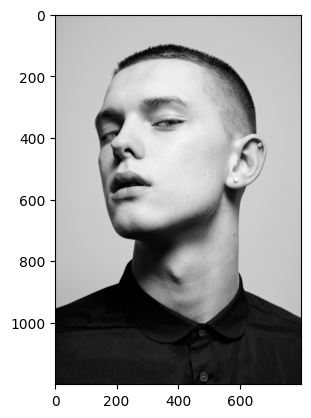

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.93144244]]
He is male.


Enter image path !!:  /kaggle/input/male-and-female-faces-dataset/Male and Female face dataset/Female Faces/0 (10).jpg


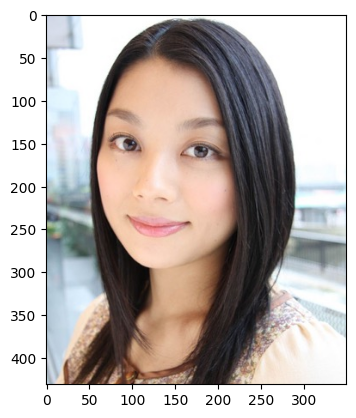

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.04350911]]
She is female.


In [200]:

import cv2
import numpy as np
import matplotlib.image as mimg
import matplotlib.pyplot as plt

from keras.models import load_model


model = Nn_model


verifications_no = int(input("Enter number of images you want to verify: "))
if verifications_no > 0:
    for i in range(verifications_no):
        new_image = input("Enter image path !!: ")
        
        img = mimg.imread(new_image)
        plt.imshow(img)
        plt.show()

        if len(img.shape) == 2:   
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        img = np.reshape(img, (1, 256, 256, 3))

        
        pred = model.predict(img)
        print(pred)

        
        output = pred[0][0]
        if output > 0.5:
            print("He is male.")
        else:
            print("She is female.")